In [1]:
from evaluator import FiLMModelEvaluator
from model import FiLMModel
from baseline_concat_model import MLPModel
from utils import *
from dataset_unseen_celllines import SciplexDatasetUnseenCellLines
import random

import anndata as ad
import math

In [2]:
cell_lines_train = ["MCF7", "A549"]
cell_lines_test = ["K562"]

In [3]:
ad_path = "../data/sciplex/sciplex_preprocessed.h5ad"

dataset_train = SciplexDatasetUnseenCellLines(ad_path, cell_lines_train, 10000)
dataset_validation = SciplexDatasetUnseenCellLines(ad_path, cell_lines_test, 10000)
dataset_test = SciplexDatasetUnseenCellLines(ad_path, cell_lines_test, 10000)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 571906/571906 [00:27<00:00, 20683.21it/s]


In [4]:
film_evalautor = FiLMModelEvaluator("../config/FiLM.yaml",FiLMModel, dataset_train, dataset_validation, dataset_test)
film_evalautor.train()
film_evalautor.test()
results = film_evalautor.get_test_results()
results = get_model_stats(results)

Begin training ...
Epoch 1/10
Iteration: 10 Test Loss: 0.44851937890052795 Avg. Validation Loss: 0.4545464697530714
Iteration: 20 Test Loss: 0.35621950030326843 Avg. Validation Loss: 0.3688904526880232
Iteration: 30 Test Loss: 0.3193417191505432 Avg. Validation Loss: 0.32959671293274834
Iteration: 40 Test Loss: 0.3011205196380615 Avg. Validation Loss: 0.3095226409071583
Iteration: 50 Test Loss: 0.28997182846069336 Avg. Validation Loss: 0.295797035855762
Iteration: 60 Test Loss: 0.27969419956207275 Avg. Validation Loss: 0.28530061649063887
Iteration: 70 Test Loss: 0.269633412361145 Avg. Validation Loss: 0.27557048201560974
Iteration: 80 Test Loss: 0.25833263993263245 Avg. Validation Loss: 0.2661349510742446
Iteration: 90 Test Loss: 0.25005191564559937 Avg. Validation Loss: 0.25944667852531045
Iteration: 100 Test Loss: 0.2424525022506714 Avg. Validation Loss: 0.25266567579770494
Iteration: 110 Test Loss: 0.2350231558084488 Avg. Validation Loss: 0.24892024216005357
Iteration: 120 Test Los

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 59.54it/s]


Testing completed. Results stored in 'self.test_results'.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:08<00:00, 21.04it/s]


Avg Pred Loss: 0.5933367443693566
Avg Null Loss: 0.09470567741892352
Avg Similarity Loss: 0.6250460929731838


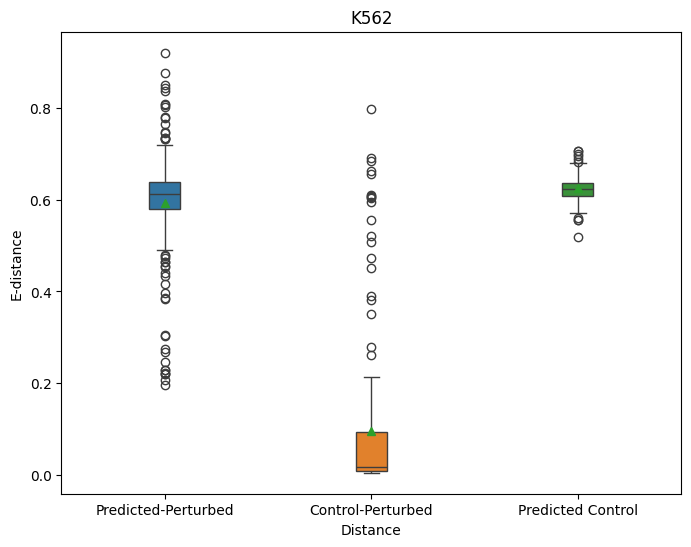

In [5]:
plot_results(results, "K562")

In [6]:
evalautor_baseline = FiLMModelEvaluator("../config/MLP_baseline.yaml",MLPModel, dataset_train, dataset_validation, dataset_test)
evalautor_baseline.train()
evalautor_baseline.test()
results = evalautor_baseline.get_test_results()
results = get_model_stats(results)

Begin training ...
Epoch 1/5
Iteration: 10 Test Loss: 0.3720282316207886 Avg. Validation Loss: 0.36790227586940183
Iteration: 20 Test Loss: 0.3413589298725128 Avg. Validation Loss: 0.33880359944650684
Iteration: 30 Test Loss: 0.32764387130737305 Avg. Validation Loss: 0.3250478016117872
Iteration: 40 Test Loss: 0.31734928488731384 Avg. Validation Loss: 0.3150182134014065
Iteration: 50 Test Loss: 0.3106570839881897 Avg. Validation Loss: 0.3064199625435522
Iteration: 60 Test Loss: 0.3019104301929474 Avg. Validation Loss: 0.2996814296407215
Iteration: 70 Test Loss: 0.29542866349220276 Avg. Validation Loss: 0.29335942712880797
Iteration: 80 Test Loss: 0.2902276813983917 Avg. Validation Loss: 0.28774894546654267
Iteration: 90 Test Loss: 0.28645384311676025 Avg. Validation Loss: 0.28328124749458444
Iteration: 100 Test Loss: 0.28010857105255127 Avg. Validation Loss: 0.27815629567130135
Iteration: 110 Test Loss: 0.27758559584617615 Avg. Validation Loss: 0.2754071314456099
Iteration: 120 Test Lo

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 59/59 [00:01<00:00, 48.00it/s]


Testing completed. Results stored in 'self.test_results'.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 185/185 [00:08<00:00, 21.46it/s]


Avg Pred Loss: 0.6106576488659781
Avg Null Loss: 0.09470567741892352
Avg Similarity Loss: 0.642510243441168


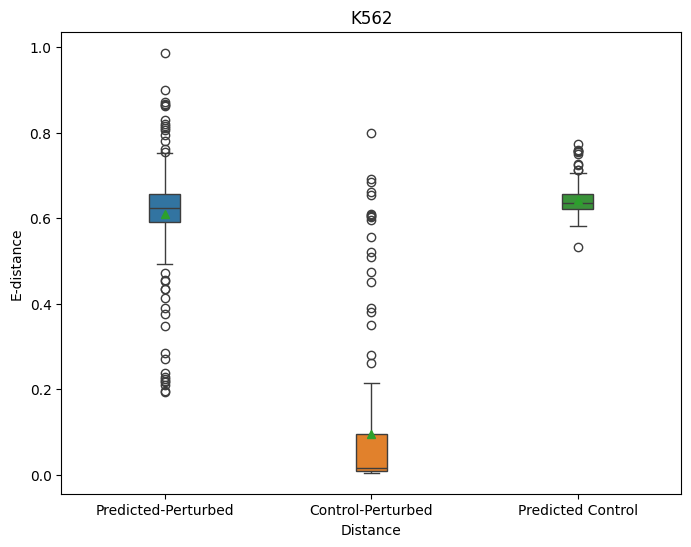

In [7]:
plot_results(results, "K562")